# **1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#**2. Reading the data**



In [ ]:
#read the data
df = pd.read_csv('/content/Heart Attack Data Set.csv')

In [ ]:
#check if the data was read successfully
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#check the number of columns and rows in the data
df.shape

(303, 14)

# **3.EDA**

## heatmap

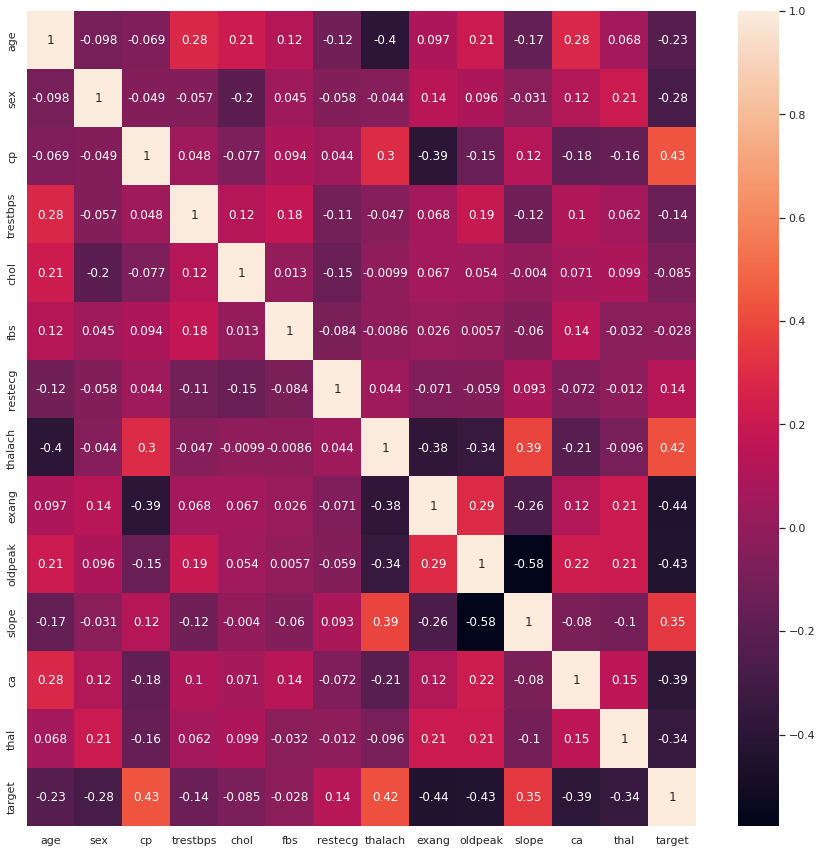

In [ ]:
#find correlation between features
sns.set(rc={'figure.figsize':(15,15)})

sns.heatmap(df.corr(),annot=True)

plt.show()

## Bar Chart

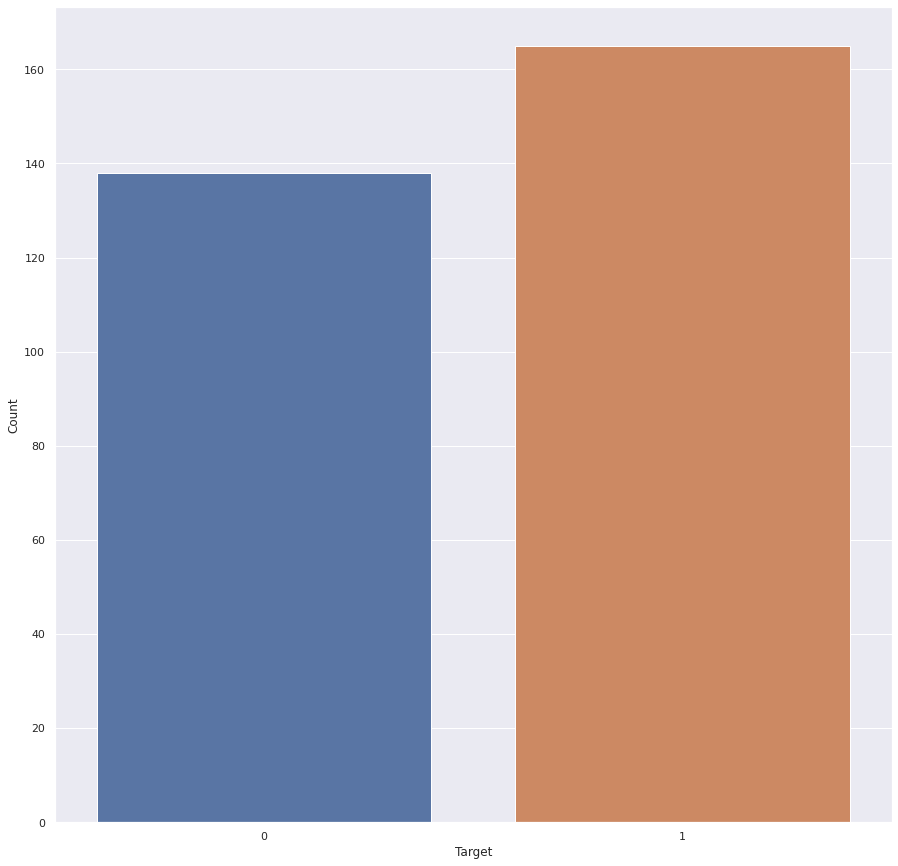

In [ ]:
#visualze the column source

# Calculate the value counts for a feature
value_counts = df['target'].value_counts()

# Plot the value counts as a bar plot
sns.barplot(x=value_counts.index, y=value_counts.values)

# Add labels to the x and y axes
plt.xlabel('Target')
plt.ylabel('Count')

# Show the plot
plt.show()

##**Box Plot**

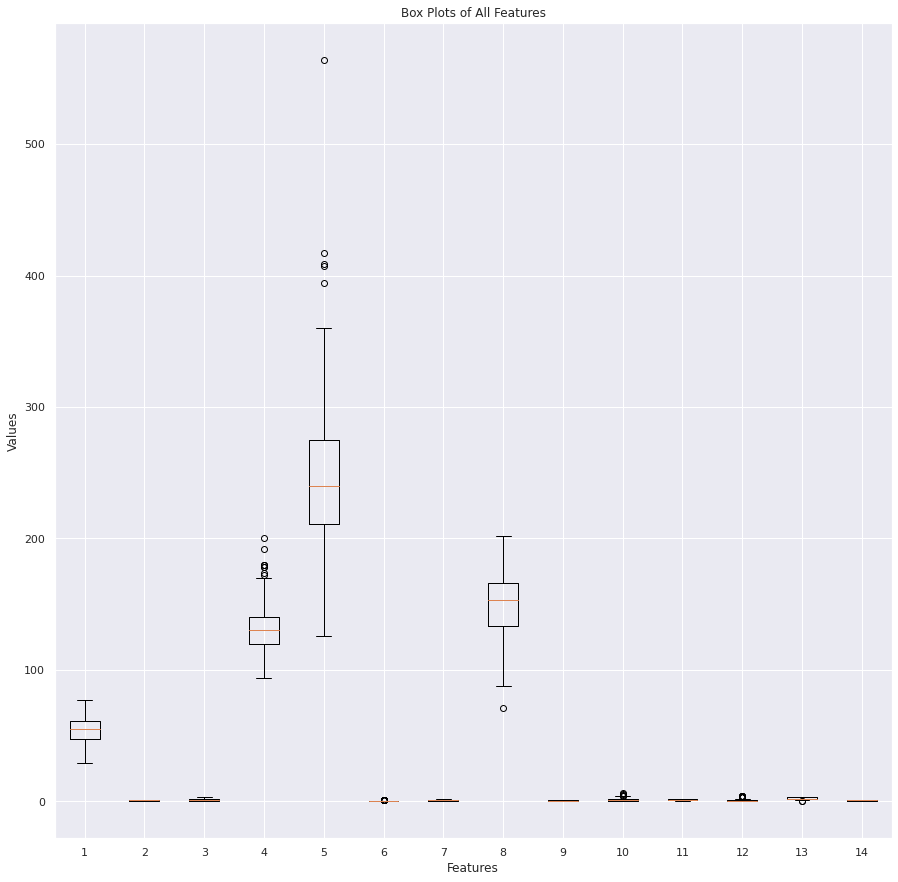

In [ ]:
plt.boxplot(df.values)

# Label the axes and add a title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plots of All Features')

# Show the plot
plt.show()

#**4. Preprocessing**

## Handeling The nulls

In [ ]:
#Check the null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Handeling the duplicates

In [ ]:
#number of duplicates
df.duplicated().sum()

1

In [ ]:
#drop the duplicates
df = df.drop_duplicates()

In [ ]:
#check that the duplicates dropped
df.duplicated().sum()

0

## Data Types

In [ ]:
#check the non-numeric data, all is numeric
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Scaling

In [ ]:
#check the minumum and maximum to the data
print(df.min())
print(df.max())

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64
age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64


In [ ]:
StandardScaler=StandardScaler()

#Columns I want to scale

Columns = ['age','trestbps','chol','thalach','oldpeak']

df[Columns] =StandardScaler.fit_transform(df[Columns])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


#5.Build The Model

## Split The Data

In [ ]:
y = df['target']
X = df.drop('target', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

##**Decision Tree**

In [ ]:
from sklearn import tree


# Train a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_tree = clf.predict(X_test)


# Evaluate the classifier on the test data
accuracy = clf.score(X_test, y_test)

acc_tree = accuracy_score(y_test, y_tree)
recall_tree = recall_score(y_test, y_tree)
precision_tree = precision_score(y_test, y_tree)
f1_tree= f1_score(y_test, y_tree)

# Print the evaluation metrics
print("Accuracy:", acc_tree)
print("Recall:", recall_tree)
print("Precision:", precision_tree)
print("F1-Score:", f1_tree)

Accuracy: 0.819672131147541
Recall: 0.78125
Precision: 0.8620689655172413
F1-Score: 0.8196721311475409


##**Random Forest**

In [ ]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred_randomForest = clf.predict(X_test)

acc_randomForest = accuracy_score(y_test, y_pred_randomForest)
recall_randomForest = recall_score(y_test, y_pred_randomForest)
precision_randomForest = precision_score(y_test, y_pred_randomForest)
f1_randomForest = f1_score(y_test, y_pred_randomForest)

# Print the evaluation metrics
print("Accuracy:", acc_randomForest)
print("Recall:", recall_randomForest)
print("Precision:", precision_randomForest)
print("F1-Score:", f1_randomForest)

Accuracy: 0.8852459016393442
Recall: 0.875
Precision: 0.9032258064516129
F1-Score: 0.8888888888888888


##**Feature Importance**

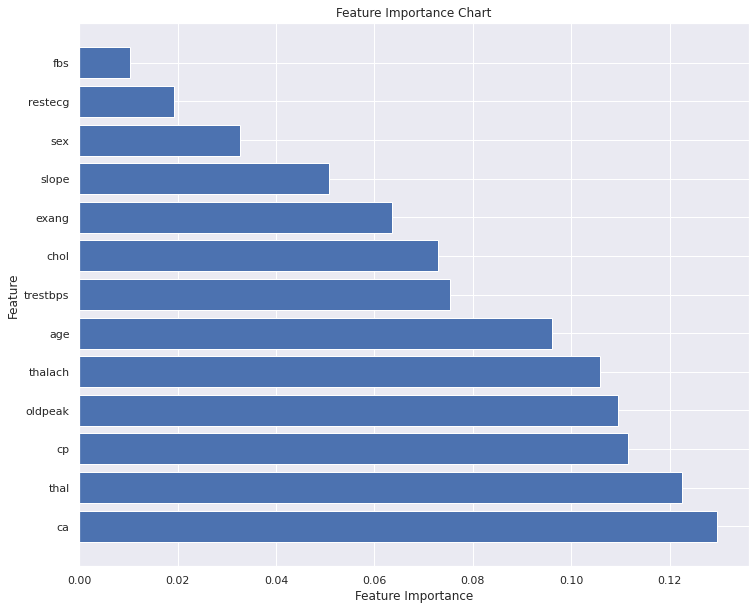

In [ ]:
# Get the feature importances from the classifier
importances = clf.feature_importances_

# Create a list of feature names
feature_names = X.columns

# Create a DataFrame with feature importances and feature names
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by feature importances

importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Plot the feature importances using a bar plot

plt.figure(figsize=(12, 10))

plt.barh(importance_df['feature'], importance_df['importance'])

plt.xlabel('Feature Importance')

plt.ylabel('Feature')

plt.title('Feature Importance Chart')

plt.show()

In [ ]:
df.drop('fbs',axis=1,inplace=True)

##**ADa Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(learning_rate= 0.002,n_estimators= 200,random_state=0)
model_ada.fit(X_train, y_train)
# Making Prediction
pred_ada = model_ada.predict(X_test)
# Calculating Accuracy Score
acc_ada = accuracy_score(y_test, pred_ada)
recall_ada = recall_score(y_test, pred_ada)
precision_ada = precision_score(y_test, pred_ada)
f1_ada = f1_score(y_test, pred_ada)

# Print the evaluation metrics
print("Accuracy:", acc_ada)
print("Recall:", recall_ada)
print("Precision:", precision_ada)
print("F1-Score:", f1_ada)

Accuracy: 0.8852459016393442
Recall: 0.9375
Precision: 0.8571428571428571
F1-Score: 0.8955223880597014


##**XGBoost**

In [ ]:
XGBoost_model = xgb.XGBClassifier()


XGBoost_model.fit(X_train, y_train)

y_pred_XGBoost = XGBoost_model.predict(X_test)


acc_XGBoost = accuracy_score(y_test, y_pred_XGBoost)
recall_XGBoost = recall_score(y_test, y_pred_XGBoost)
precision_XGBoost = precision_score(y_test, y_pred_XGBoost)
f1_XGBoost = f1_score(y_test, y_pred_XGBoost)

# Print the evaluation metrics
print("Accuracy:", acc_XGBoost)
print("Recall:", recall_XGBoost)
print("Precision:", precision_XGBoost)
print("F1-Score:", f1_XGBoost)

Accuracy: 0.8524590163934426
Recall: 0.8125
Precision: 0.896551724137931
F1-Score: 0.8524590163934426


##**Nerual Networks**

In [ ]:
from tensorflow.keras import models, layers, regularizers, optimizers

def build_model(hidden_layers, neurons, activation, optimizer, reg_alpha):
  model = models.Sequential()
  model.add(layers.Dense(neurons, activation=activation, input_shape=(X_train.shape[1],),
                         kernel_regularizer=regularizers.l1(reg_alpha)))
  for _ in range(hidden_layers - 1):
    model.add(layers.Dense(neurons, activation=activation,
                           kernel_regularizer=regularizers.l1(reg_alpha)))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  return model

# Defining hyperparameters
hidden_layers = [1, 2, 3]
neurons = [32, 64, 128]
activations = ['relu', 'tanh']
optimizers = ['adam', 'rmsprop']
reg_alpha = [0.0001, 0.001, 0.01]

# Grid search for hyperparameter tuning
best_acc = 0.0
for hl in hidden_layers:
  for n in neurons:
    for act in activations:
      for opt in optimizers:
        for ra in reg_alpha:
          model = build_model(hl, n, act, opt, ra)
          model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)
          _, acc = model.evaluate(X_test, y_test)
          if acc > best_acc:
            best_acc = acc
            best_params = {'hidden_layers': hl, 'neurons': n, 'activation': act, 'optimizer': opt, 'reg_alpha': ra}

print('Best Accuracy: ', best_acc)
print('Best Parameters: ', best_params)

2/2 [==============================] - 0s 7ms/step - loss: 0.7599 - accuracy: 0.8689
Best Accuracy:  0.9344262480735779
Best Parameters:  {'hidden_layers': 1, 'neurons': 64, 'activation': 'relu', 'optimizer': 'rmsprop', 'reg_alpha': 0.001}


In [ ]:

# Defining the model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', test_acc)

Epoch 1/30
8/8 [==============================] - 1s 3ms/step - loss: 0.8202 - accuracy: 0.5187
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.7388 - accuracy: 0.6846
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.6971
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7510
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.7635
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.7842
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5852 - accuracy: 0.7801
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7925
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.8008
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8050
Epoch 11/30
8/8 [======================

In [ ]:

y_pred_nerual = model.predict(X_test)

# Round the predicted output to the nearest integer
y_pred_nerual = np.round(y_pred_nerual)

acc_nerual= accuracy_score(y_test, y_pred_nerual)
recall_nerual = recall_score(y_test, y_pred_nerual)
precision_nerual = precision_score(y_test, y_pred_nerual)
f1_nerual = f1_score(y_test, y_pred_nerual)

# Print the evaluation metrics
print("Accuracy:", acc_nerual)
print("Recall:", recall_nerual)
print("Precision:", precision_nerual)
print("F1-Score:", f1_nerual)

2/2 [==============================] - 0s 5ms/step
Accuracy: 0.9344262295081968
Recall: 0.90625
Precision: 0.9666666666666667
F1-Score: 0.9354838709677419


#**6.Compare the Models**

In [ ]:
model_names = ['Decision Tree', 'Random Forest', 'XGBoost','Ada Boost','Nerual Networks']

Accuracy = [0.7704918032786885,0.8852459016393442,0.8524590163934426,0.8852459016393442,0.9354838709677419]

Recall = [0.78125,0.875,0.9375,0.8125,0.90625]

f1_score = [0.82,0.89,0.90,0.85,0.94]

precision = [0.8620689655172413,0.9032258064516129,0.8571428571428571,0.896551724137931,0.9666666666666667]


##**Accuracy**

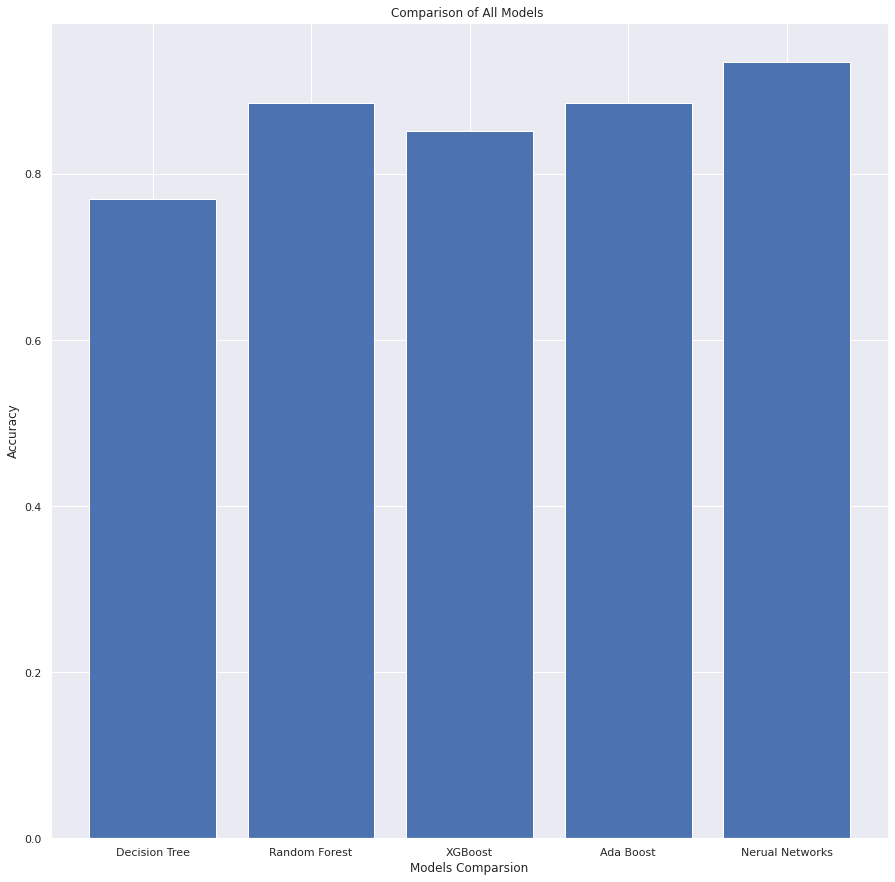

In [ ]:
#Accuracy
plt.bar(model_names, Accuracy)
plt.xlabel('Models Comparsion')
plt.ylabel('Accuracy')
plt.title('Comparison of All Models ')

plt.show()

##**Recall**

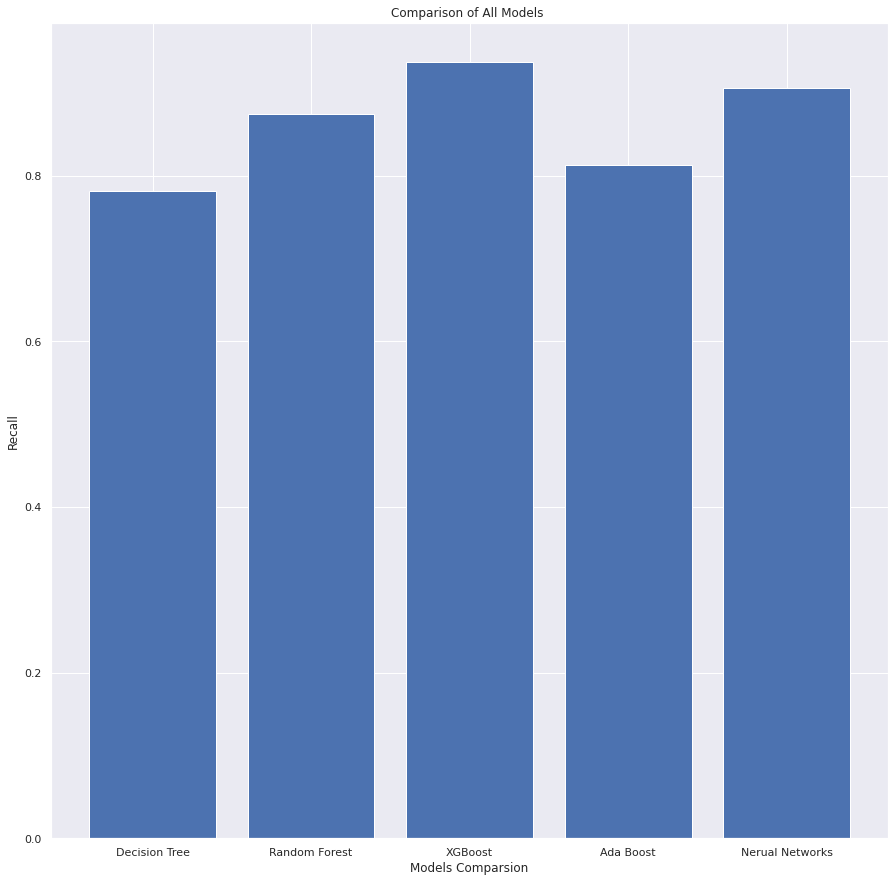

In [ ]:
plt.bar(model_names, Recall)
plt.xlabel('Models Comparsion')
plt.ylabel('Recall')
plt.title('Comparison of All Models ')

plt.show()

##**F1 Score**

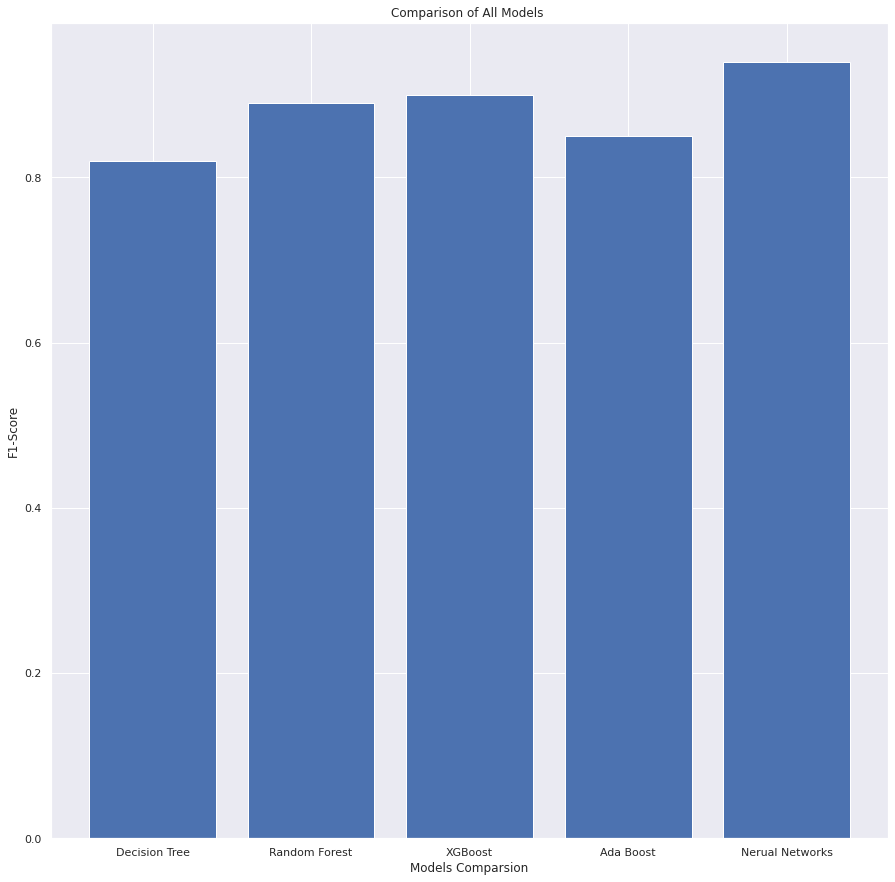

In [ ]:
plt.bar(model_names, f1_score)
plt.xlabel('Models Comparsion')
plt.ylabel('F1-Score')
plt.title('Comparison of All Models ')

plt.show()

##**Precision**

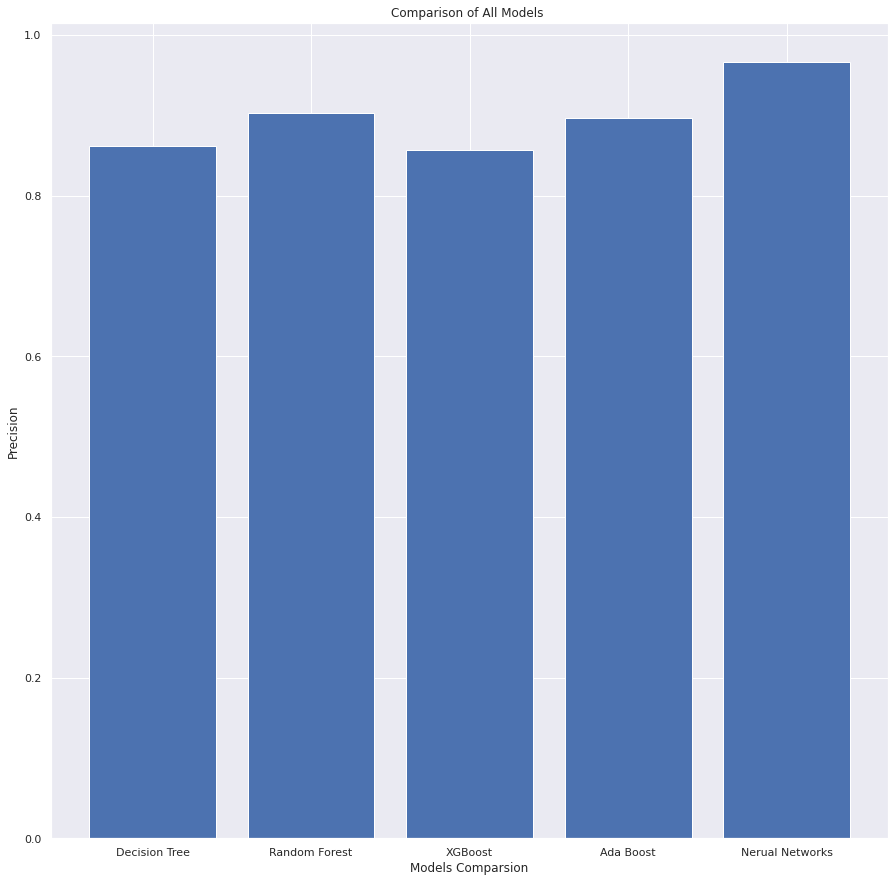

In [ ]:
plt.bar(model_names, precision)
plt.xlabel('Models Comparsion')
plt.ylabel('Precision')
plt.title('Comparison of All Models ')

plt.show()